In [70]:
import pandas as pd
import seaborn as sns
import numpy as np 
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

In [3]:
sales_data = pd.read_csv('./data_files/sales_predictions.csv')
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 1) How many rows and columns?
## 2) What are the datatypes of each variable?
## 3) Are there duplicates? If so, drop any duplicates.

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
print(sales_data.dtypes)

print(sales_data.duplicated().sum())

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
0


## 4) Identify missing values.

In [6]:
sales_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [7]:
#im using interpolate to address the missing values in the Item_Weight column 
#looking at avgs of the two item weights before using interpolate and after they only change by .02
sales_data_inter = sales_data.interpolate()
print('Before:',sales_data['Item_Weight'].mean())
print('After:', sales_data_inter['Item_Weight'].mean())

#changing it on the main DF 
sales_data = sales_data.interpolate()

Before: 12.857645184136183
After: 12.831222280887394


In [8]:
#now to take care of the missing string values in Outlet_Size since there is not a correct way to assume the size of the outlet 
#without seeing it im replaceing all the NaN values with a 'missing' str

sales_data.fillna('Missing', inplace=True)

## 6) Confirm that there are no missing values after addressing them.

In [9]:
sales_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7.) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [10]:
sales_data.groupby('Item_Fat_Content').sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
LF,4038.837083,21.054330,43857.1062,631348,6.552424e+05
Low Fat,65614.964167,326.541080,717390.8394,10167044,1.101503e+07
Regular,36784.992500,200.970026,409413.1214,5771667,6.457454e+06
low fat,1408.102500,7.313655,15071.7328,223539,2.338270e+05
reg,1513.611250,7.764190,15948.6810,233923,2.295765e+05


In [11]:
sales_data.replace(['LF', 'low fat'], 'Low Fat', inplace=True)
sales_data.replace('reg', 'Regular', inplace=True)
sales_data.groupby('Item_Fat_Content').sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
Low Fat,71061.90375,354.909065,776319.6784,11021931,1.190409e+07
Regular,38298.60375,208.734216,425361.8024,6005590,6.687031e+06


## 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [12]:
print('Min:', sales_data['Item_Weight'].min())
print('Max:', sales_data['Item_Weight'].max())
print('Mean:', sales_data['Item_Weight'].mean())

Min: 4.555
Max: 21.35
Mean: 12.831222280887394


In [13]:
print('Min:', sales_data['Item_Visibility'].min())
print('Max:', sales_data['Item_Visibility'].max())
print('Mean:', sales_data['Item_Visibility'].mean())

Min: 0.0
Max: 0.328390948
Mean: 0.06613202877895127


In [14]:
print('Min:', sales_data['Item_MRP'].min())
print('Max:', sales_data['Item_MRP'].max())
print('Mean:', sales_data['Item_MRP'].mean())	

Min: 31.29
Max: 266.8884
Mean: 140.9927819781768


In [15]:
print('Min:', sales_data['Item_Outlet_Sales'].min())
print('Max:', sales_data['Item_Outlet_Sales'].max())
print('Mean:', sales_data['Item_Outlet_Sales'].mean())	

Min: 33.29
Max: 13086.9648
Mean: 2181.2889135750365


# Project 1 - Part 3 (Core)

## Histogram to view the distributions of various features in your dataset

In [16]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


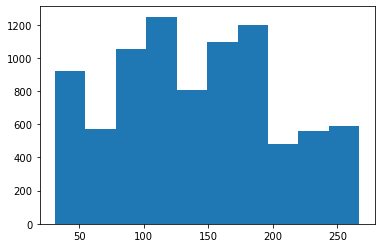

In [17]:
plt.hist(sales_data['Item_MRP'])
plt.show()


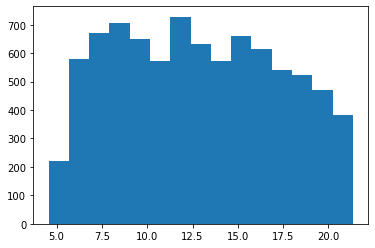

In [18]:
plt.hist(sales_data['Item_Weight'], bins=15)
plt.show()

## Boxplot to view statistical summaries of various features in your dataset.

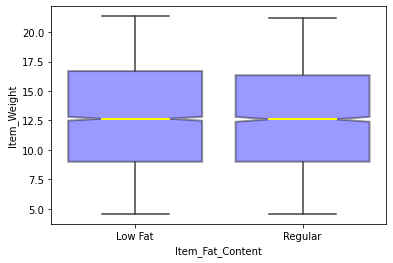

This shows that regardless of the fat content they are relatively the same in weight


In [19]:
sns.boxplot(
    x='Item_Fat_Content', y='Item_Weight', data=sales_data, notch=True, 
    medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
    boxprops = dict(linestyle='-', linewidth=2, color='Black', facecolor = 'blue', alpha = .4))
plt.show()
print('This shows that regardless of the fat content they are relatively the same in weight')

## Heatmap of the correlation between features.

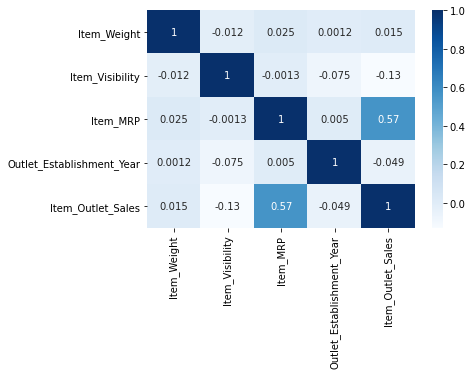

you can see that the Item Mrp and the outlet sales have a good corrolation to eachother mostly due to the fact they both involve pricing data


In [20]:
corr = sales_data.corr()
sns.heatmap(corr, cmap='Blues', annot=True )
plt.show()
print('you can see that the Item Mrp and the outlet sales have a good corrolation to eachother mostly due to the fact they both involve pricing data')

# Project 1 Part 4

In [101]:
total_sales = sales_data.groupby('Outlet_Type').sum().reset_index()
total_sales

,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Grocery Store,13823.82375,113.565873,151939.1470,2156970,3.680343e+05
1,Supermarket Type1,71661.71000,338.651189,787549.8868,11150224,1.291734e+07
2,Supermarket Type2,11946.46500,56.621454,131477.7724,1864352,1.851823e+06
3,Supermarket Type3,11928.50875,54.804764,130714.6746,1855975,3.453926e+06


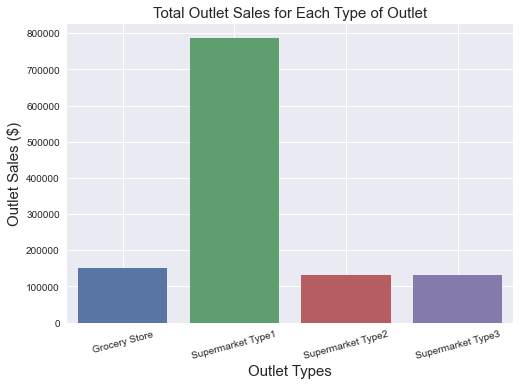

we can see from this graph that the supermarket Type 3 does the best in sales


In [113]:
sns.barplot(total_sales['Outlet_Type'], total_sales['Item_MRP'])
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total Outlet Sales for Each Type of Outlet', fontsize=15)
plt.ylabel('Outlet Sales ($)', fontsize=15)
plt.xlabel('Outlet Types',  fontsize=15)
plt.xticks(rotation=15,  fontsize=10)
plt.yticks(fontsize=10)
plt.grid('x')
plt.show()

print('we can see from this graph that the supermarket Type 1 does the best in sales')

In [52]:
fat_content = sales_data.groupby(['Outlet_Type', 'Item_Fat_Content']).count().reset_index()
fat_content.head()

,Outlet_Type,Item_Fat_Content,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,Grocery Store,Low Fat,705,705,705,705,705,705,705,705,705,705
1,Grocery Store,Regular,378,378,378,378,378,378,378,378,378,378
2,Supermarket Type1,Low Fat,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609
3,Supermarket Type1,Regular,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968
4,Supermarket Type2,Low Fat,598,598,598,598,598,598,598,598,598,598


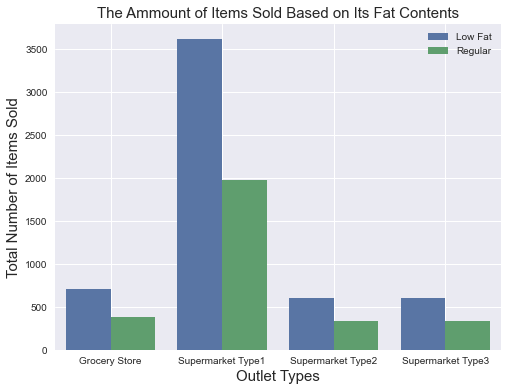

we can see that more people are likely to buy low fat item over regular items regardless of the type of store 


In [61]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
sns.barplot(fat_content['Outlet_Type'],fat_content['Item_Outlet_Sales'], hue=fat_content['Item_Fat_Content'])
plt.ylabel("Total Number of Items Sold", fontsize=15)
plt.xlabel('Outlet Types', fontsize=15)
plt.title('The Ammount of Items Sold Based on Its Fat Contents', fontsize=15)
plt.grid('x')
plt.legend()
plt.show()
print('we can see that more people are likely to buy low fat item over regular items regardless of the type of store ')

In [122]:
avg_item_type_cost = sales_data.groupby(['Outlet_Type','Item_Type']).mean().reset_index()
avg_item_type_cost.head()

,Outlet_Type,Item_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Grocery Store,Baking Goods,12.619471,0.121518,126.438068,1991.423529,292.082544
1,Grocery Store,Breads,12.275833,0.103925,146.452873,1991.696970,381.967442
2,Grocery Store,Breakfast,13.145000,0.132249,147.026989,1991.157895,412.831042
3,Grocery Store,Canned,12.160531,0.098872,138.080808,1991.232877,352.864879
4,Grocery Store,Dairy,13.301866,0.118935,147.166715,1991.076087,341.866589


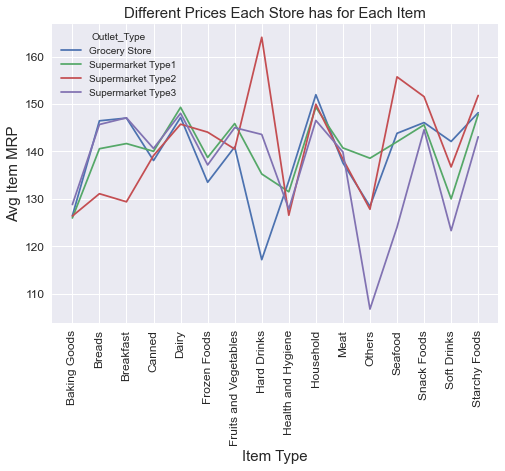

In [137]:
sns.lineplot('Item_Type', 'Item_MRP', hue='Outlet_Type', data=avg_item_type_cost)
plt.xlabel('Item Type', fontsize=15)
plt.ylabel('Avg Item MRP', fontsize=15)
plt.title('Different Prices Each Store has for Each Item', fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()